## Rosenblatt's Perceptron

Illustration of Rosenblatt's Perceptron as a linear decision boundary using 2D random points

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Helper functions


In [3]:
def get_dt_dn(a,s):
    """
    gets tangential and normal vector of line defined by a and s
    
    Arguments
    a -- y-intercept of the seperating line
    s -- slope of the separating line
    
    Returns:
    dy -- y-intercept vector
    dt -- normal vector along line  
    dn -- normal vector of line      
    """
    dy = [0,a]  #y-intercept
    norm = np.linalg.norm([1,s]) #required for unit norm
    dt = [1,s]/norm  #slope unit vector
    dn = [-s,1]/norm #normal vector to dt
    
    return dy,dt,dn


def get_plot_points(a,s,distance = 2):
    """
    obtains two points along the line defined by a and s
    
    Arguments
    a -- y-intercept of the seperating line
    s -- slope of the separating line
    distance -- distance between the two points
    
    Returns:
    xp -- points to be plotted   
    """    
    #define helper vector
    dy,dt,dn = get_dt_dn(a,s)
    
    xp = np.zeros((2,2))
    xp[0] = dy-0.5*distance*dt
    xp[1] = dy+0.5*distance*dt
    
    return xp


def create_data(centres, sigmas, num_points, seed=1):
    """
    Arguments:
    centres -- list of points in 2D used as centres
    sigmas -- list of std 2D for selection of points around centres
    num_points -- number of points to select for each centre

    Returns:
    point_list, labels
    """

    point_list = np.zeros((centres.shape[0] * num_points, centres.shape[1]))
    labels = np.zeros((centres.shape[0] * num_points),dtype=int)

    np.random.seed(seed)  # set the seet

    for i0 in np.arange(centres.shape[0]):
        point_list[i0 * num_points:(i0+1)*num_points,:] = centres[i0,:].reshape(1, centres.shape[1]) + \
                    sigmas[i0,:].reshape(1, centres.shape[1])*2*(np.random.normal(0,1,(num_points, centres.shape[1]))-0.5)

        labels[i0 * num_points:(i0+1)*num_points] = i0

    return point_list, labels


def plot_data(point_list, labels, n_vec=[], b_vec=[], distance = 2):
    """
    Arguments:
    point_list -- list of points
    labels -- labels
    """
    col = ['r+','g+','b+','c+','m+','y+']
    col_line = ['r-','g-','b-','c-','m-','y-']
    
    labels_unique = np.unique(labels)
    
    for i0 in np.arange(labels_unique.size):
        plt.plot(point_list[labels==labels_unique[i0],0],point_list[labels==labels_unique[i0],1],col[i0])

    if len(n_vec) > 0:
        x0 = -n_vec[:,0]*b_vec[0]
        dt = np.array([-n_vec[1,0],n_vec[0,0]])
        xp = np.zeros((2,2))
        xp[0] = x0-0.5*distance*dt
        xp[1] = x0+0.5*distance*dt
    
        plt.plot(xp[:,0],xp[:,1], col_line[i0])

    plt.show()

### Create a set of points corresponding to two categories in 2D plane

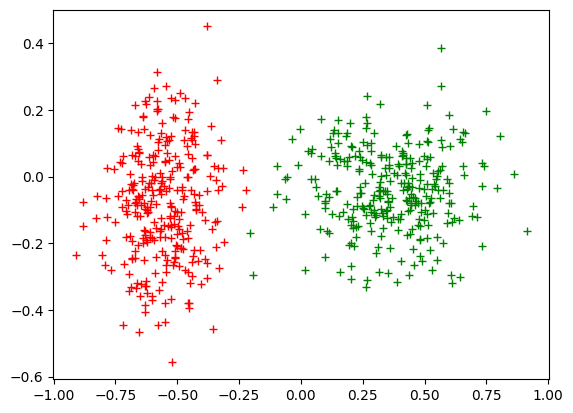

In [4]:
#chose the centres
centres = np.array([[-0.5,0],[0.5,0]]) 

#define the spread of the points around the centres
sigmas = .02*np.array([[3,4],[5,3]])
num_points = 300

x,y = create_data(centres, sigmas, num_points, seed=3)

plot_data(x, y)

### Class Perceptron

Constructor receives $weights$ - a (2,1)-shaped vector - and bias. Using the $propagate()$ method a prediction on a set of points $x$ - a (n,2)-vector - can be done. Result is one or zero. The method $calc\_error()$ gives back the error of the prediction $y\_pred$ compared to the ground truth $y$.

In [5]:
class Perceptron:
    """
    simple Perceptron class (without optimisation)
    """
    cost_MSE = 0
    cost_CE = 1
    
    def __init__(self, weights, bias):
        """
        constructor

        Arguments:
        weights -- weight vector of shape (2,1)
        bias -- bias value
        """
        
        self.w = weights
        self.b = bias     
    
    def propagate(self, x):
        """
        predicted outcome for x
        """
        z = x @ self.w + self.b
        y_pred = 1*(0 <= z)
                    
        return y_pred

    
    def calc_error(self, y_pred, y):
        """
        get error information
        """
        m = y.shape[0]
         
        error = np.sum(np.abs(y_pred - y.reshape((m,1)))) / m 

        return error


### Sample execution of Perceptron


In [6]:
weights = np.array([[0],[1]])
bias = 0.

Percep = Perceptron(weights, bias)

y_pred = Percep.propagate(x)

print(Percep.calc_error(y_pred,y))

0.4633333333333333


### Plot the results

[1.]
[[0.]
 [1.]]
[0.]


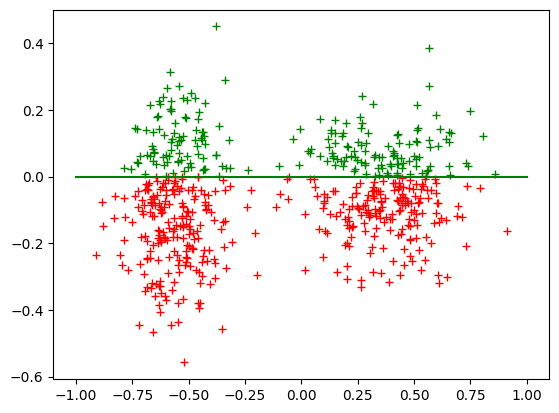

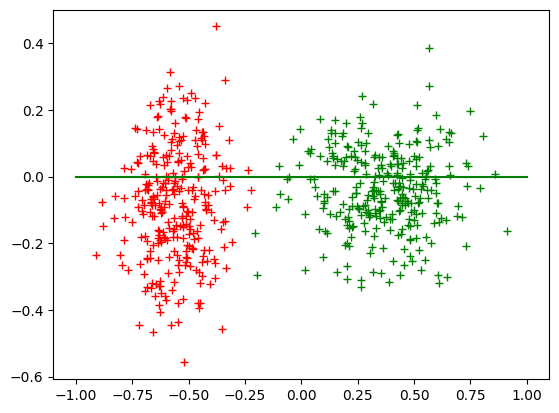

In [7]:
norm_w = np.sqrt(np.sum(Percep.w**2,0))
n_vec = Percep.w/norm_w
b_vec = Percep.b/norm_w

print(norm_w)
print(n_vec)
print(b_vec)


plot_data(x, y_pred[:,0], n_vec, b_vec.reshape([1,1]))
plot_data(x, y, n_vec, b_vec.reshape([1,1]))